In [1]:
#Drop Box File 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

C:\Users\majid\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv(r'./dataset/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.shape

(891, 12)

In [4]:
#df.describe()
#df.describe(include=['object'])
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


# EDA Analysis

In [5]:
# Data Prep

#from dataprep.eda import create_report
#create_report(df).show()

# Scatter Plot Matrix

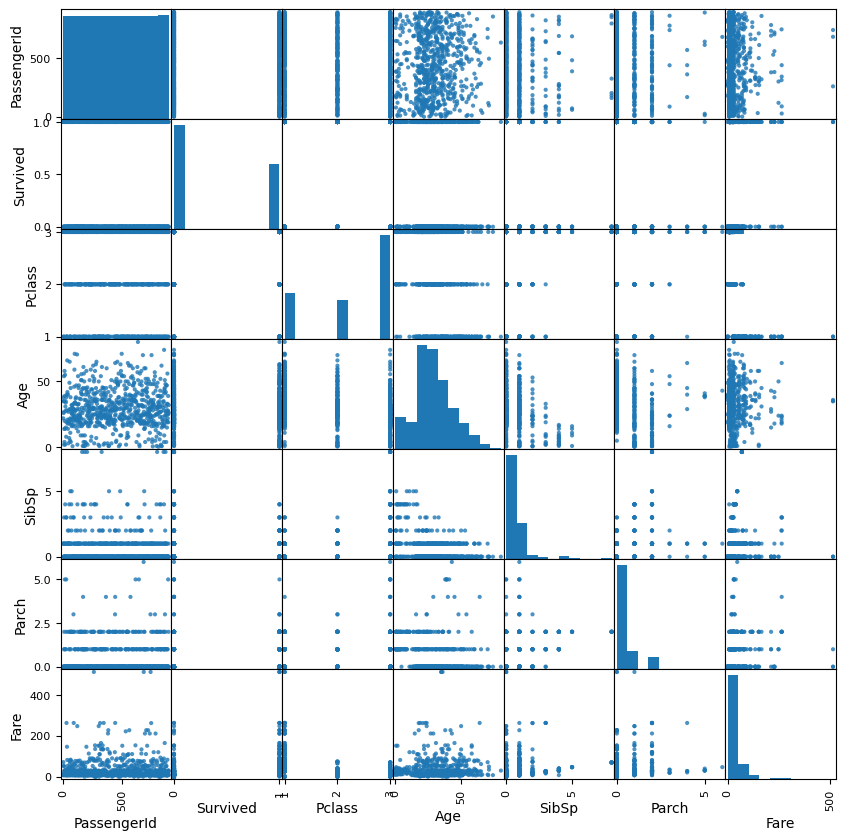

In [6]:
pd.plotting.scatter_matrix(df, alpha=0.8, figsize=(10, 10), diagonal='hist')
plt.show()

# <span style='color:Blue'> Duplicate Data Handeling  </span>

In [7]:
# In this step, we find duplicate values. It is clear some unique values like PassengerId should not be involved in duplication function.
# Also, Target value does not have an important role in finding duclicated values.

df[df.loc[:, ~df.columns.isin(['Survived', 'PassengerId'])].duplicated()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


# Outliers Functions

### Outlier Detection Function

In [8]:
# Z-score detection
# def outliers_show_zscore (data, col, threshold=3): # you can see the dataframe includes outliers values (only one column) 
#     _mean = np.mean(data[col])
#     _std = np.std(data[col])
#     zscore = data[col].apply(lambda x: (x - _mean) / _std)
#     outliers = data[np.abs(zscore) > threshold]
#     return outliers

def outliers_detection_zscore (data, threshold=3, cols=None, plot=False): # you can calculate the outliers values (for several columns)
    _out_dics = {}
    
    
    if not(cols):
        cols = []
        for col in data.columns:
            if data[col].dtypes != 'object':
                cols.append(col)
                
    correct_cols=cols.copy()
    for col in cols:
        if col not in data.columns.tolist():
            print (f"WARNING: The feature \033[1m{col}\033[0m is  not in features!")
            correct_cols.remove(col)
            continue
        elif data[col].dtypes == 'object':
            print (f"WARNING: The feature \033[1m{col}\033[0m has an object type!")
            correct_cols.remove(col)
            continue
        else:
            _mean = np.mean(data[col])
            _std = np.std(data[col])
            zscore = data[col].apply(lambda x: (x - _mean) / _std)
            outliers_index = data[np.abs(zscore) > threshold].index.tolist()
            outliers_value = data[np.abs(zscore) > threshold][col].tolist()
            _out_dics [col] = list (zip(outliers_index , outliers_value ))

    if plot:
        #data[cols].plot()
        sns.boxplot(data=data[correct_cols], orient='h')
        plt.show()
    
    return _out_dics



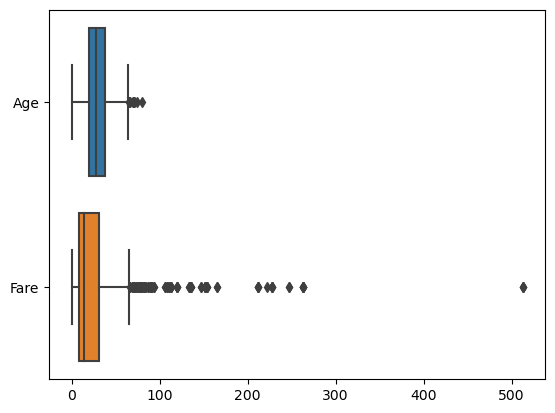

{'Age': [(630, 80.0), (851, 74.0)],
 'Fare': [(27, 263.0),
  (88, 263.0),
  (118, 247.5208),
  (258, 512.3292),
  (299, 247.5208),
  (311, 262.375),
  (341, 263.0),
  (377, 211.5),
  (380, 227.525),
  (438, 263.0),
  (527, 221.7792),
  (557, 227.525),
  (679, 512.3292),
  (689, 211.3375),
  (700, 227.525),
  (716, 227.525),
  (730, 211.3375),
  (737, 512.3292),
  (742, 262.375),
  (779, 211.3375)]}

In [9]:
outliers_detection_zscore(df, cols=['Age','Name', 'Majid','Fare'], plot=True)

In [10]:
# IQR detection
# def outliers_IQR(data, col):
#     q1,q3=data[col].quantile(0.25), data[col].quantile(0.75)
#     l,u=q1-(1.5*(q3-q1)), q3+(1.5*(q3-q1))
#     outliers = data.loc [(data[col] < l) | (data[col] > u)]
#     return outliers

In [11]:
# IQR detection

def outliers_detection_IQR (data, cols=None, plot=False): # you can calculate the outliers values (for several columns)
    _out_dics = {}
    
    
    if not(cols):
        cols = []
        for col in data.columns:
            if data[col].dtypes != 'object':
                cols.append(col)
                
    correct_cols=cols.copy()
    for col in cols:
        if col not in data.columns.tolist():
            print (f"WARNING: The feature \033[1m{col}\033[0m is  not in features!")
            correct_cols.remove(col)
            continue
        elif data[col].dtypes == 'object':
            print (f"WARNING: The feature \033[1m{col}\033[0m has an object type!")
            correct_cols.remove(col)
            continue
        else:
            q1,q3=data[col].quantile(0.25), data[col].quantile(0.75)
            l,u=q1-(1.5*(q3-q1)), q3+(1.5*(q3-q1))
            outliers_index = data.loc [(data[col] < l) | (data[col] > u)].index.tolist()
            outliers_value = data.loc [(data[col] < l) | (data[col] > u)][col].tolist()
            _out_dics [col] = list (zip(outliers_index , outliers_value ))

    if plot:
        #data[cols].plot()
        sns.boxplot(data=data[correct_cols], orient='h')
        plt.show()
    
    return _out_dics



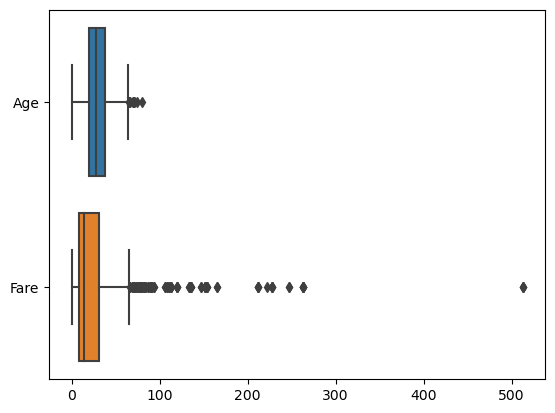

{'Age': [(33, 66.0),
  (54, 65.0),
  (96, 71.0),
  (116, 70.5),
  (280, 65.0),
  (456, 65.0),
  (493, 71.0),
  (630, 80.0),
  (672, 70.0),
  (745, 70.0),
  (851, 74.0)],
 'Fare': [(1, 71.2833),
  (27, 263.0),
  (31, 146.5208),
  (34, 82.1708),
  (52, 76.7292),
  (61, 80.0),
  (62, 83.475),
  (72, 73.5),
  (88, 263.0),
  (102, 77.2875),
  (118, 247.5208),
  (120, 73.5),
  (124, 77.2875),
  (139, 79.2),
  (151, 66.6),
  (159, 69.55),
  (180, 69.55),
  (195, 146.5208),
  (201, 69.55),
  (215, 113.275),
  (218, 76.2917),
  (224, 90.0),
  (230, 83.475),
  (245, 90.0),
  (256, 79.2),
  (257, 86.5),
  (258, 512.3292),
  (262, 79.65),
  (268, 153.4625),
  (269, 135.6333),
  (275, 77.9583),
  (290, 78.85),
  (291, 91.0792),
  (297, 151.55),
  (299, 247.5208),
  (305, 151.55),
  (306, 110.8833),
  (307, 108.9),
  (310, 83.1583),
  (311, 262.375),
  (318, 164.8667),
  (319, 134.5),
  (324, 69.55),
  (325, 135.6333),
  (332, 153.4625),
  (334, 133.65),
  (336, 66.6),
  (337, 134.5),
  (341, 263.0)

In [12]:
outliers_detection_IQR(df, cols=['Age','Name', 'Majid','Fare'], plot=True)

### Outliers Management Function

In [13]:
#This approach works only for 1 column, so, if you apply outlier detection for more than one column,
#you should do it for each column seperately

def outlier_mng (data, col=None, outlier=None, replace=None):
    # Approaches: 
    # - Trim
    # - Mean
    # - Median
    # - Remove
    # - Constant
    
    if len(outlier)>1:
        return f"Please call the function with only one feature outlier for  argument 'col'"

    if not (outlier[col]):
        return f"There is no outlier in column {col}"
    
    
    _index = [item[0] for item in _outlier[col]]
    _item = [item[1] for item in _outlier[col]]
    if type(replace) != str:
        data.loc [ _index , col] = replace
    else:
        if replace == 'Trim':
            q1,q3 = data[col].quantile(0.25), data[col].quantile(0.75)
            l,u = q1-(1.5*(q3-q1)), q3+(1.5*(q3-q1))
            for i in range(len(_item)):
                if _item[i] > u:
                    data.loc [_index[i] , col] = u
                elif _item[i] < l:
                    data.loc [_index[i] , col] = l
        elif replace == 'Mean':
            data.loc [ _index , col] = data[col].mean()
        elif replace == 'Median':
            data.loc [ _index , col] = data[col].median()
        elif replace == 'Remove':
            data.drop(_index, axis=0, inplace=True)
        else:
            print (f'There is not approach {replace}')
        

In [14]:
df2=df.copy()
_outlier = outliers_detection_IQR(df2, cols=['Age'], plot=False)
outlier_mng (df2, col='Age', outlier=_outlier, replace='Trim')

# Normality Function

In [15]:
# In many of statistics questions, firstly we determine if the distribution is normal or not. 
# -> the approaches: Shapiro, Kolmogorov–Smirnov, ...
# In normal cases, it is appropriate to apply "parametric approaches" like T (with a dgree of freedom) or Z. 
# In the cases without normal distribution, it is better to apply "non-parametric approaches" like 
# sign test, kruskal-wallis, ...
# Here, we provide a set of algorithms to test the normality of features (if it is neccessary!).
# For more information, you can see other usages of it. for example, when you want to test two samples with different distribution
# you should calculate their MEAN. the result shows that there are 2 different MEANs, you should apply "s pool" 
# (calculated based on the data) 
# Also, there are two kinds of groups in the experiments which apply non-parametric methods, Dependent or Independent groups. 
#  Dependent groups: the samples are from the same source but experiment in different labratories.
# Independent groups: the samles are from different sources and experiment in different labratories or same labratory.
# .................... In the end, lets go to see the code ;-) 

# Histogram
import matplotlib.pyplot as plt
def Histogram (data, col):
    plt.hist(data[col], edgecolor='black', bins=20)
    
    
# Q-Q Plot
# Quantile - Quantile plot
#Do you need more information?? Please check this link: https://www.youtube.com/watch?v=okjYjClSjOg
import statsmodels.api as sm

def QQ_plot(data, col):
    fig = sm.qqplot(data[col], line='q')
    plt.show()


# Shapiro Test 
#The result contains 2 values, statistics and p-value
#If p-value is less than 0.05, the distribution would not be normal
#Do you need more information?? Please check this link: https://www.youtube.com/watch?v=eh9eYLBecWk&t=0s
from scipy.stats import shapiro 
def Shapiro (data, col):
    if data[col].isna().sum() > 0: 
        print(f"The feature \033[1m{col}\033[0m has at least one missing value which ignored automatically!")
        result = shapiro(data[~(data[col].isna())][col])
    else:
        result = shapiro(data[col])
    return result.statistic, result.pvalue

# Kolmogorov-Smirnov Test
# This method can not analyse the missing values, so, we ignore the misiing values first.
from scipy.stats import kstest
def KS (data, col):
    if data[col].isna().sum() > 0: 
        print(f"The feature \033[1m{col}\033[0m has at least one missing value which ignored automatically!")
        result = kstest(data[~(data[col].isna())][col], 'norm')
    else:
        result = kstest(data[col], 'norm')
    return result.statistic, result.pvalue

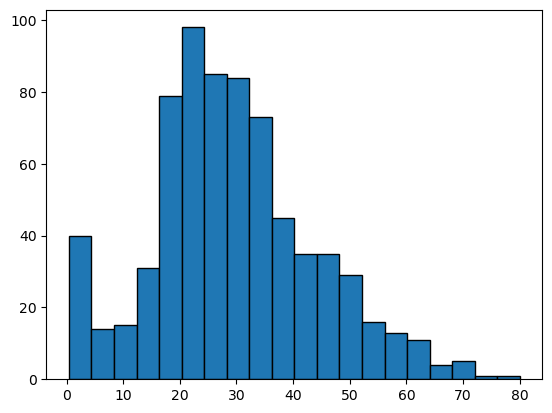

In [16]:
Histogram(df,'Age')

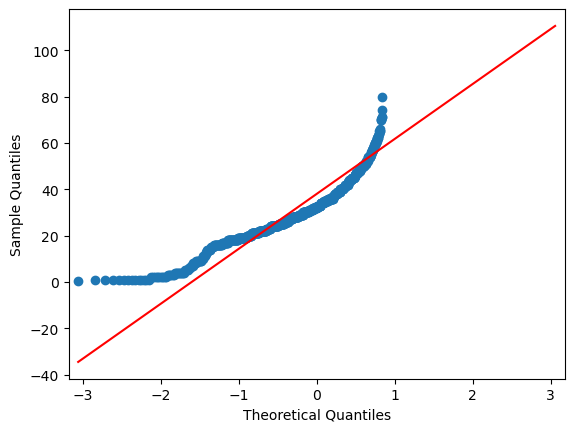

In [17]:
QQ_plot(df, 'Age')

In [18]:
_Statistics , _Pvalue = Shapiro(df, 'Age')
print (f'Statistics: {_Statistics}')
print (f'P-value: {_Pvalue}')

The feature Age has at least one missing value which ignored automatically!
Statistics: 0.981458306312561
P-value: 7.340329943872348e-08


In [19]:
_Statistics , _Pvalue = KS (df, 'Age')
print (f'Statistics: {_Statistics}')
print (f'P-value: {_Pvalue}')

The feature Age has at least one missing value which ignored automatically!
Statistics: 0.9650366565902186
P-value: 0.0


# Missing Analysis

In [20]:
missing_info = pd.DataFrame({'Missing count':df.isna().sum(), 'Missing percent':round(df.isna().sum()/df.shape[0] * 100,2)})
missing_info

,Missing count,Missing percent
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


<AxesSubplot:>

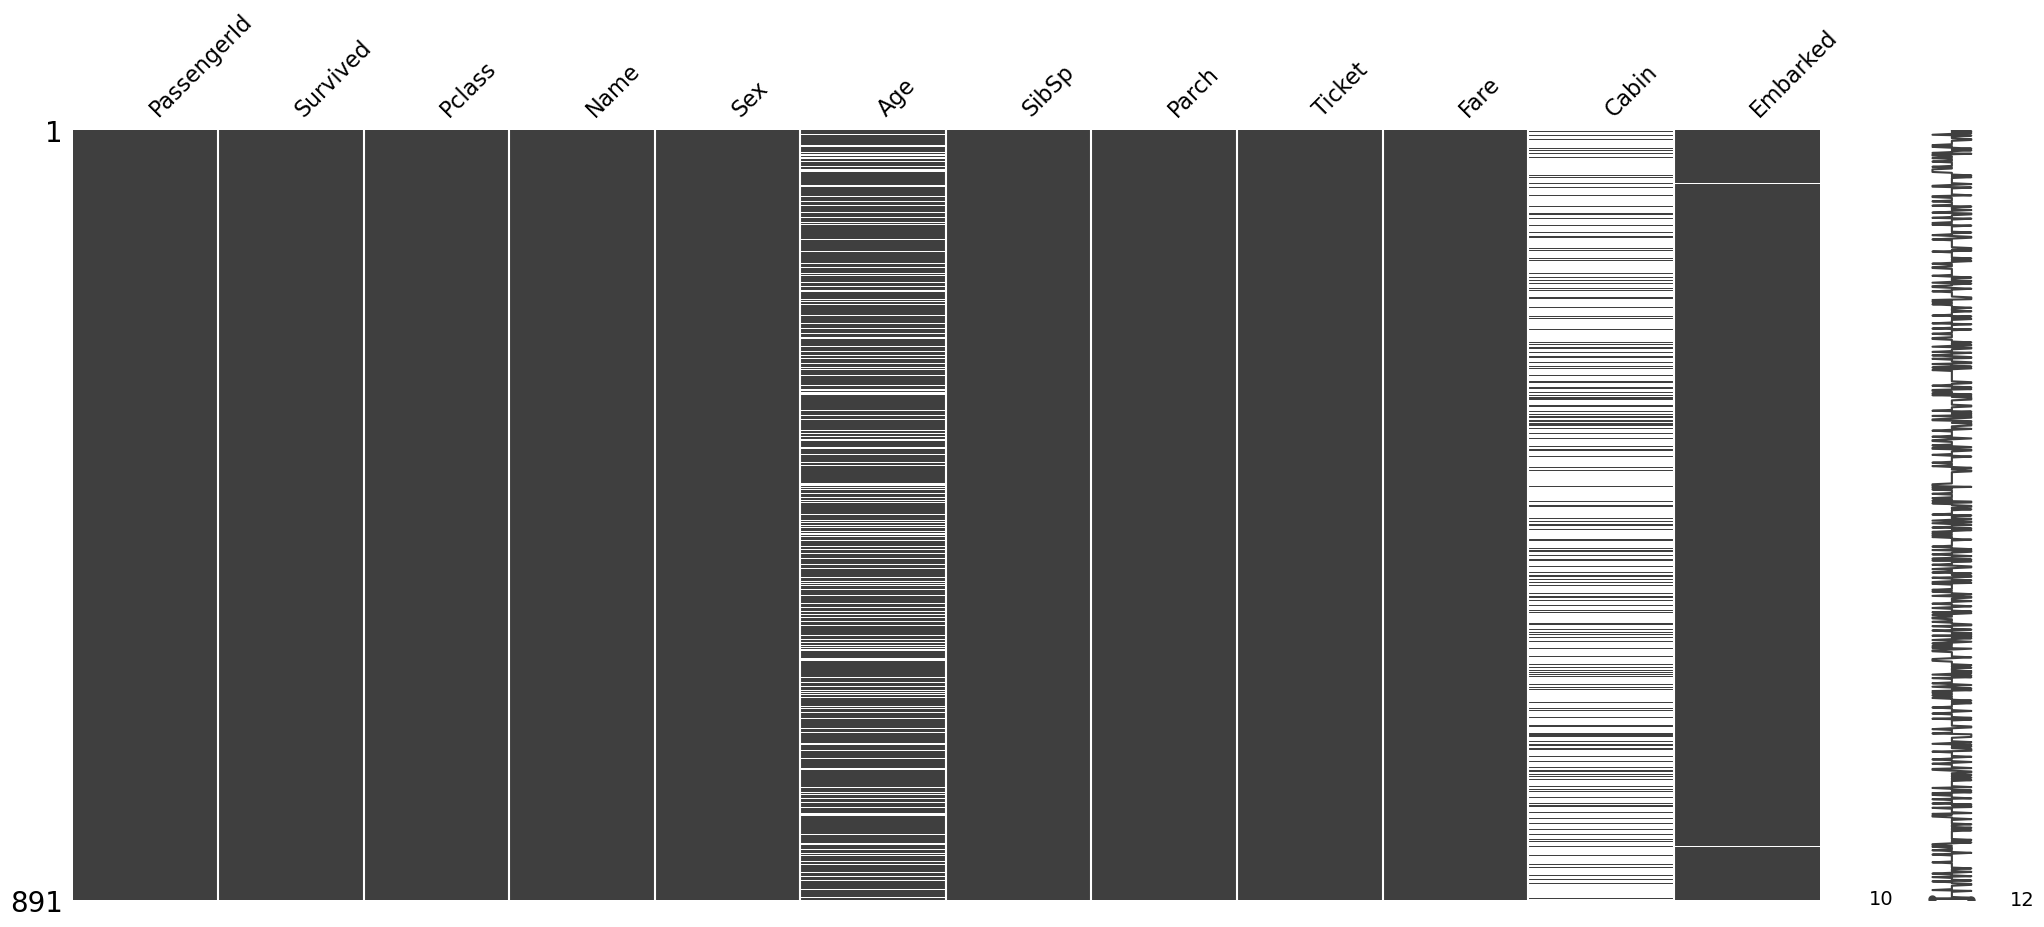

In [21]:
#The library missingno can show the location of the misiing values with while space
import missingno as msno

msno.matrix(df)

<AxesSubplot:>

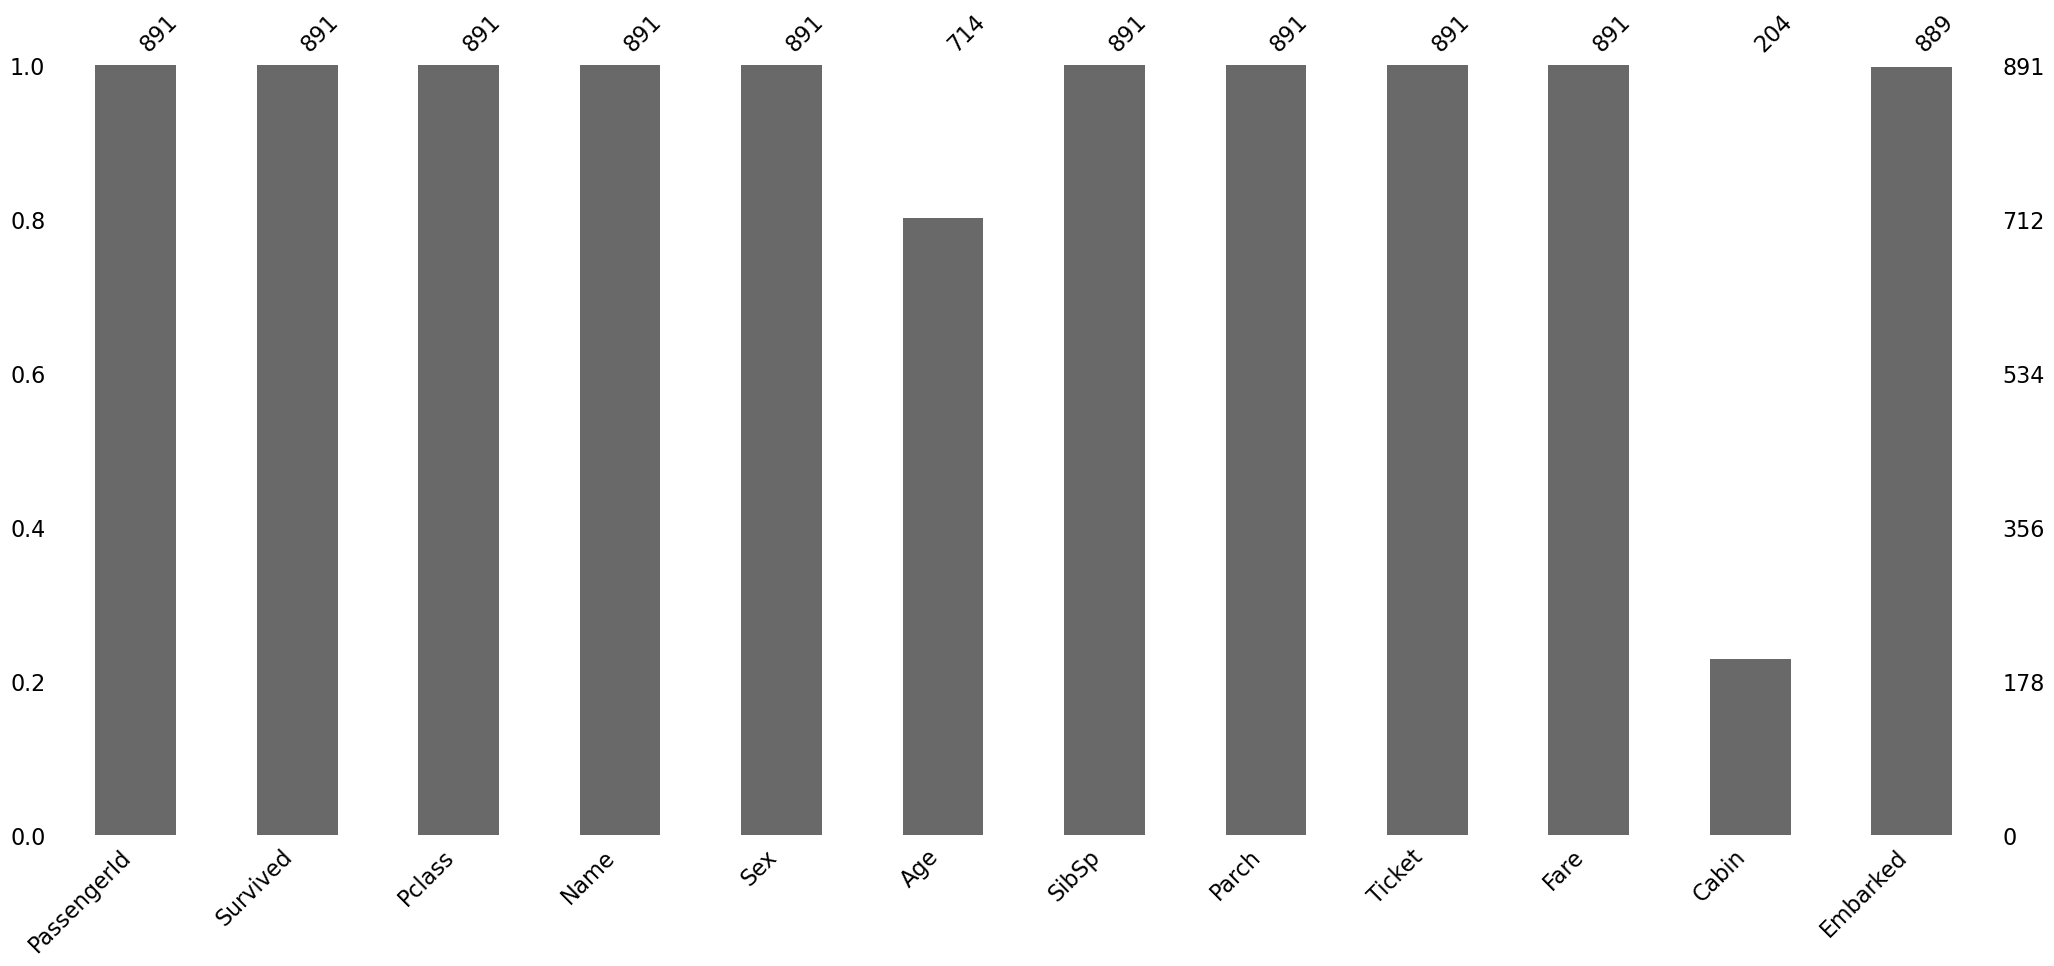

In [22]:
msno.bar(df)

<AxesSubplot:>

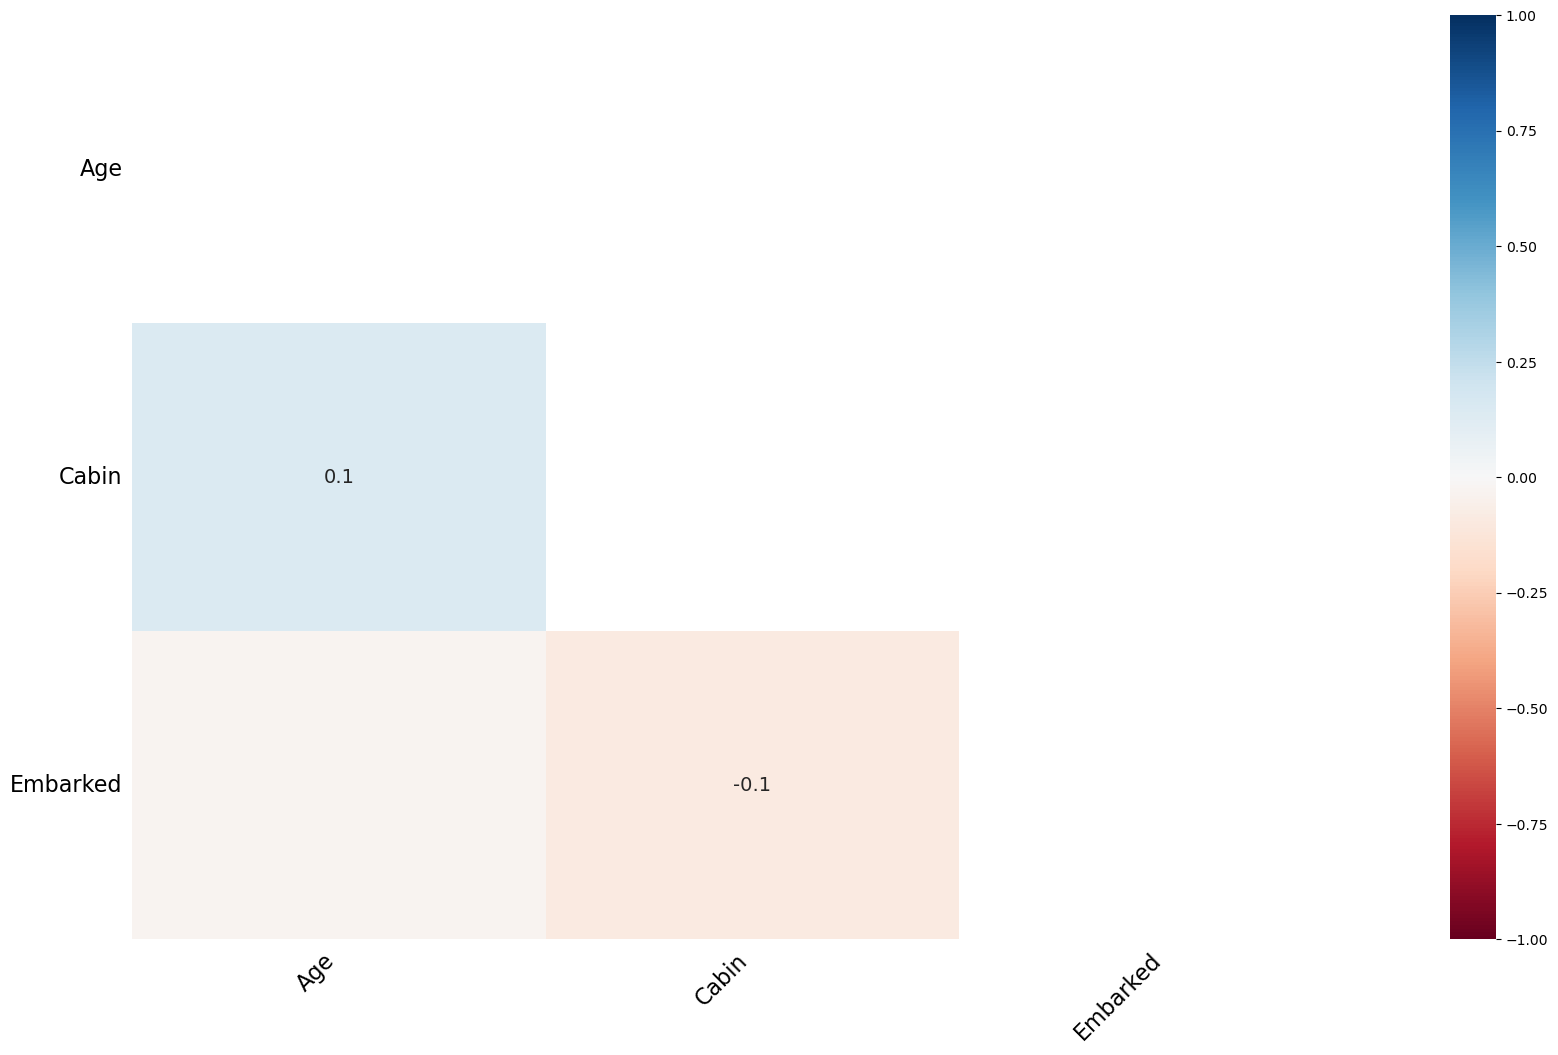

In [23]:
msno.heatmap(df)

In [24]:
#Based on EDA and the information gained by missingno, there are 3 variable with misiing values, Age, Cabin and Embarked.
#We will deal with them in the related parts separately.

# Encoding

In [25]:
#https://medium.com/aiskunks/categorical-data-encoding-techniques-d6296697a40f

class encode_feature:
    def __init__(self, data, cols, drop=False, inplace=False, target='' , target2=pd.DataFrame()):
    #def __init__(self, data, cols, drop=False, inplace=False, target='' , target2=pd.DataFrame()):
        self.data = data
#         self.data2 = self.data.copy()
#         self.data2.drop('Survived',inplace=True, axis=1)
        self.cols = cols
        self.drop = drop
        self.inplace = inplace
        self.target = target
        self.target2 = target2
        self.encoded_data = pd.DataFrame()
        for col in self.cols:
            if self.data[col].dtype != 'object' and  self.data[col].dtype != 'category':
                cols.remove(col)                
                print (f"The feature {col} is not categorical!")

    def one_hot (self):
        for col in self.cols:
            one_hot = pd.get_dummies(self.data[col], prefix=col)
            self.data = pd.concat([self.data, one_hot], axis=1)
            self.encoded_data = pd.concat([self.encoded_data, self.data[col], one_hot], axis=1)       
        return self.return_value()

    
    def dummy (self):
        for col in self.cols:
            dummy_df = pd.get_dummies(self.data[col], drop_first=True, prefix=col)
            self.data = pd.concat([self.data, dummy_df], axis=1)
            self.encoded_data = pd.concat([self.encoded_data, self.data[col], dummy_df], axis=1)       
        return self.return_value()

    
    def label (self):
        from sklearn.preprocessing import LabelEncoder
        le = LabelEncoder()
        for col in self.cols:
            self.data[f'{col}_encoded'] = le.fit_transform(df[col])    
            #self.data = pd.concat([self.data, self.data[f'{col}_encoded']], axis=1)
            self.encoded_data = pd.concat([self.encoded_data, self.data[col], self.data[f'{col}_encoded']], axis=1)       
        return self.return_value()

    def ordinal (self):
        for col in self.cols:
            quality_dict = {value: index for index, value in enumerate(self.data[col].unique())}
            self.data[f'{col}_encoded'] = self.data[col].map(quality_dict)
            self.encoded_data = pd.concat([self.encoded_data, self.data[col], self.data[f'{col}_encoded']], axis=1)       
        return self.return_value()

    def binary (self):
        for col in self.cols:
            quality_dict = {value: index for index, value in enumerate(self.data[col].unique())}
            self.data[f'{col}_encoded'] = self.data[col].map(quality_dict).apply(lambda x: format(x, 'b'))
            self.encoded_data = pd.concat([self.encoded_data, self.data[col], self.data[f'{col}_encoded']], axis=1)       
        return self.return_value()

    def count (self):
        for col in self.cols:
            counts = self.data[col].value_counts()
            self.data[f'{col}_encoded'] = self.data[col].map(counts)
            self.encoded_data = pd.concat([self.encoded_data, self.data[col], self.data[f'{col}_encoded']], axis=1)       
        return self.return_value()

    def target_encoder (self):
        for col in self.cols:
            #self.data = pd.concat([self.data, df[self.target]], axis=1)
            target_mean = self.data.groupby(col)[self.target].mean()
            self.data[f'{col}_encoded'] = self.data[col].map(target_mean)
            self.encoded_data = pd.concat([self.encoded_data, self.data[col], self.data[f'{col}_encoded']], axis=1)       
        return self.return_value()


#     def target_encoder2 (self):
#         for col in self.cols:
#             self.data2 = pd.concat([self.data2, self.target2], axis=1)
#             print(self.data2.columns[-1])
#             target_mean = self.data2.groupby(col)[self.data2.columns[-1]].mean()
#             print(target_mean)
#             self.data2[f'{col}_encoded'] = self.data2[col].map(target_mean)
#             self.encoded_data = pd.concat([self.encoded_data, self.data2[col], self.data2[f'{col}_encoded']], axis=1)       
#         return self.return_value()
    
    def return_value (self):
        if self.drop:
            self.data = self.data.drop(self.cols, axis=1)
            self.encoded_data = self.encoded_data.drop(self.cols, axis=1)
        if self.inplace:
            return self.data
        else:
            return self.encoded_data


In [26]:
pd.set_option('display.max_columns', None)
encodd = encode_feature(df2, ['Sex','Cabin'], False, False, 'Survived')
df2 = encodd.target_encoder()
df2.head()

,Sex,Sex_encoded,Cabin,Cabin_encoded
0,male,0.188908,NaN,NaN
1,female,0.742038,C85,1.0
2,female,0.742038,NaN,NaN
3,female,0.742038,C123,0.5
4,male,0.188908,NaN,NaN


In [27]:
# https://github.com/scikit-learn-contrib/category_encoders
#https://pypi.org/project/category-encoders/

#pip install category-encoders

import category_encoders as ce

# encoder = ce.BackwardDifferenceEncoder(cols=['Sex','Cabin'])
# encoder = ce.BaseNEncoder(cols=['Sex','Cabin'])
# encoder = ce.BinaryEncoder(cols=['Sex','Cabin'])
# encoder = ce.CatBoostEncoder(cols=['Sex','Cabin'])
# encoder = ce.CountEncoder(cols=['Sex','Cabin'])
# encoder = ce.GLMMEncoder(cols=['Sex','Cabin'])
# encoder = ce.GrayEncoder(cols=['Sex','Cabin'])
# encoder = ce.HashingEncoder(cols=['Sex','Cabin'])
# encoder = ce.HelmertEncoder(cols=['Sex','Cabin'])
# encoder = ce.JamesSteinEncoder(cols=['Sex','Cabin'])
# encoder = ce.LeaveOneOutEncoder(cols=['Sex','Cabin'])
# encoder = ce.MEstimateEncoder(cols=['Sex','Cabin'])
encoder = ce.OneHotEncoder(cols=['Sex','Cabin'])
# encoder = ce.OrdinalEncoder(cols=['Sex','Cabin'])
# encoder = ce.PolynomialEncoder(cols=['Sex','Cabin'])
# encoder = ce.QuantileEncoder(cols=['Sex','Cabin'])
# encoder = ce.RankHotEncoder(cols=['Sex','Cabin'])
# encoder = ce.SumEncoder(cols=['Sex','Cabin'])
# encoder = ce.TargetEncoder(cols=['Sex','Cabin'])
# encoder = ce.WOEEncoder(cols=['Sex','Cabin'])


X=df.drop("Survived", axis=1)
y=df[['Survived']]
encoder.fit(X, y)
X_cleaned = encoder.transform(X)
X_cleaned.head()

,PassengerId,Pclass,Name,Sex_1,Sex_2,Age,SibSp,Parch,Ticket,Fare,Cabin_1,Cabin_2,Cabin_3,Cabin_4,Cabin_5,Cabin_6,Cabin_7,Cabin_8,Cabin_9,Cabin_10,Cabin_11,Cabin_12,Cabin_13,Cabin_14,Cabin_15,Cabin_16,Cabin_17,Cabin_18,Cabin_19,Cabin_20,Cabin_21,Cabin_22,Cabin_23,Cabin_24,Cabin_25,Cabin_26,Cabin_27,Cabin_28,Cabin_29,Cabin_30,Cabin_31,Cabin_32,Cabin_33,Cabin_34,Cabin_35,Cabin_36,Cabin_37,Cabin_38,Cabin_39,Cabin_40,Cabin_41,Cabin_42,Cabin_43,Cabin_44,Cabin_45,Cabin_46,Cabin_47,Cabin_48,Cabin_49,Cabin_50,Cabin_51,Cabin_52,Cabin_53,Cabin_54,Cabin_55,Cabin_56,Cabin_57,Cabin_58,Cabin_59,Cabin_60,Cabin_61,Cabin_62,Cabin_63,Cabin_64,Cabin_65,Cabin_66,Cabin_67,Cabin_68,Cabin_69,Cabin_70,Cabin_71,Cabin_72,Cabin_73,Cabin_74,Cabin_75,Cabin_76,Cabin_77,Cabin_78,Cabin_79,Cabin_80,Cabin_81,Cabin_82,Cabin_83,Cabin_84,Cabin_85,Cabin_86,Cabin_87,Cabin_88,Cabin_89,Cabin_90,Cabin_91,Cabin_92,Cabin_93,Cabin_94,Cabin_95,Cabin_96,Cabin_97,Cabin_98,Cabin_99,Cabin_100,Cabin_101,Cabin_102,Cabin_103,Cabin_104,Cabin_105,Cabin_106,Cabin_107,Cabin_108,Cabin_109,Cabin_110,Cabin_111,Cabin_112,Cabin_113,Cabin_114,Cabin_115,Cabin_116,Cabin_117,Cabin_118,Cabin_119,Cabin_120,Cabin_121,Cabin_122,Cabin_123,Cabin_124,Cabin_125,Cabin_126,Cabin_127,Cabin_128,Cabin_129,Cabin_130,Cabin_131,Cabin_132,Cabin_133,Cabin_134,Cabin_135,Cabin_136,Cabin_137,Cabin_138,Cabin_139,Cabin_140,Cabin_141,Cabin_142,Cabin_143,Cabin_144,Cabin_145,Cabin_146,Cabin_147,Cabin_148,Embarked
0,1,3,"Braund, Mr. Owen Harris",1,0,22.0,1,0,A/5 21171,7.2500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,38.0,1,0,PC 17599,71.2833,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,C
2,3,3,"Heikkinen, Miss. Laina",0,1,26.0,0,0,STON/O2. 3101282,7.9250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,35.0,1,0,113803,53.1000,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,S
4,5,3,"Allen, Mr. William Henry",1,0,35.0,0,0,373450,8.0500,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,S


# Scaling

In [28]:
#StandardScaler
#z = (x - u) / s --> u: mean, s: std

def standard_scaler (data):
    
    if not([col for col in data.columns if data[col].dtype == 'object']):
        from sklearn.preprocessing import StandardScaler
        scaler = StandardScaler()
        return pd.DataFrame(scaler.fit_transform(data))
    else:
        print ("No action was committed! There is at least one feature which has categorical values!")
        return data

In [29]:
df2 = standard_scaler (df[['Age','Fare','Cabin']])
df2.head()

No action was committed! There is at least one feature which has categorical values!


,Age,Fare,Cabin
0,22.0,7.2500,NaN
1,38.0,71.2833,C85
2,26.0,7.9250,NaN
3,35.0,53.1000,C123
4,35.0,8.0500,NaN


In [30]:
# MinMaxScaler
def minmax_scaler (data):
    
    if not([col for col in data.columns if data[col].dtype == 'object']):
        from sklearn.preprocessing import MinMaxScaler
        scaler = MinMaxScaler()
        return pd.DataFrame(scaler.fit_transform(data), columns=data.columns)
    else:
        print ("No action was committed! There is at least one feature which has categorical values!")
        return data

In [31]:
df2 = minmax_scaler (df[['Age','Fare']])
df2.head()

,Age,Fare
0,0.271174,0.014151
1,0.472229,0.139136
2,0.321438,0.015469
3,0.434531,0.103644
4,0.434531,0.015713


# Balancing

In [32]:
#https://elitedatascience.com/imbalanced-classes
#https://imbalanced-learn.org/stable/over_sampling.html
# ----------------------------------------------------------------

#https://www.youtube.com/watch?v=4SivdTLIwHc
#https://github.com/dataprofessor/imbalanced-data

#! pip install -U imbalanced-learn

def show_balancing(data, target):
    data[target].value_counts().plot.pie(autopct='%.2f')
    #fig1, ax1 = plt.subplots()
    #ax1.pie(data[target].value_counts(), autopct='%.2f', labels=data[target].value_counts().index)


def under_sampling (data, target):
    from imblearn.under_sampling import RandomUnderSampler
    
    y = data[[target]]
    X = data.drop(target, axis=1)
    
    rus = RandomUnderSampler(sampling_strategy=1) # Numerical value
    # rus = RandomUnderSampler(sampling_strategy="not minority") # String
    X_res, y_res = rus.fit_resample(X, y)

    ax = y_res.value_counts().plot.pie(autopct='%.2f')
    _ = ax.set_title("Under-sampling")
    
    return pd.concat([X_res, y_res], axis = 1)

def over_sampling (data, target):
    from imblearn.over_sampling import RandomOverSampler
    
    y = data[[target]]
    X = data.drop(target, axis=1)
    
    ros = RandomOverSampler(sampling_strategy=1) # Numerical value
    # rus = RandomOverSampler(sampling_strategy="not minority") # String
    X_res, y_res = ros.fit_resample(X, y)

    ax = y_res.value_counts().plot.pie(autopct='%.2f')
    _ = ax.set_title("Over-sampling")
    
    return pd.concat([X_res, y_res], axis = 1)


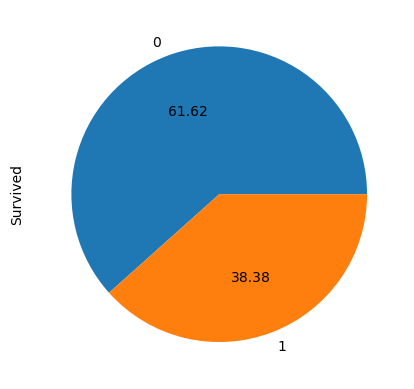

In [33]:
show_balancing (df, 'Survived')

0    342
1    342
Name: Survived, dtype: int64

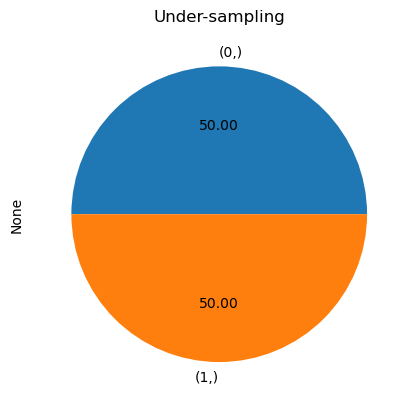

In [34]:
df2 = under_sampling(df, 'Survived')
df2.head()
df2.Survived.value_counts()


# PassengerID Analysis

In [35]:
#As this field is completely unique, we assessed it as a non-effective feature.
#But, we assumed it is an useful field for index
#So, we set it for index :-)

#Set PassengerId as Index
df.set_index('PassengerId',inplace=True)

# Pclass Analysis

As many people say money can't buy everything, at first we decided to consider Pclass as a categorical feature, because we do not see any more chance for surviving people who bought a first class ticket more than others who bought second or third types of tickets. Then we decided to analyse it based on survival ratio for each class. 
The result shows that the passenegers of Pclass 1 were given a very high priority while rescue. Survival ratio in Pclass 1 is around __63%__ while for Pclass2 is around __48%__. Even though the the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around __25%__.

In [36]:
#Calculating the frequency of survival passengers based on their ticket class type
_crosstab = pd.crosstab(df.Pclass,df.Survived,margins=True).style.background_gradient(cmap='summer_r')
_crosstab

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


In [37]:
#The percentage of survival based on each Pclass
Sur_Perc = []
for i in range(1,4):
    Sur_Perc.append (round (df[(df['Pclass'] == i) & (df['Survived'] == 1)]['Pclass'].count() 
                            / df [df['Pclass'] == i]['Pclass'].count(), 2))
Sur_Perc

[0.63, 0.47, 0.24]

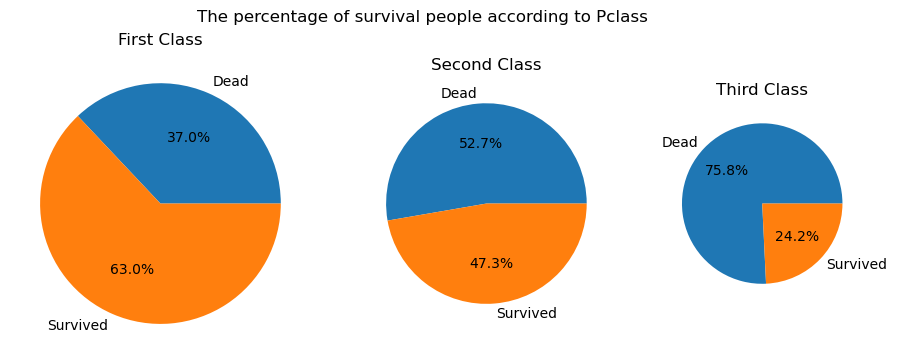

In [38]:
#Illustrate the percent of survivals in each class
#Although we could apply "subplot" for illutrating 3 pie charts in the seperated parts of a row,
#we decided to apply "gridspec". This approach enables us to change the height and width size of each part seperately.
# ............... and we are happy to learn a new approach :)

import matplotlib.gridspec as gridspec

#gs = gridspec.GridSpec(2, 2, width_ratios=[1, 2], height_ratios=[2, 1])
#ax1 = plt.subplot(gs[0, 0])
#ax2 = plt.subplot(gs[0, 1])
#ax3 = plt.subplot(gs[1, :])


_label = ['Dead','Survived']
_title = ['First Class', 'Second Class', 'Third Class']
_crosstab2 = pd.crosstab(df.Pclass,df.Survived)
plt.figure(figsize=(11,4))
gs = gridspec.GridSpec(1, 3, width_ratios=[6, 5, 4], height_ratios=[2])

for i in range(3):
    plt.subplot(gs[i])
    #plt.subplot(1, 3, i+1)
    _data = [_crosstab2.iloc[i,0],_crosstab2.iloc[i,1]]
    plt.pie(_data, labels = _label, autopct='%1.1f%%')
    plt.title(_title[i])

plt.suptitle('The percentage of survival people according to Pclass')
plt.show() 

C:\Users\majid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


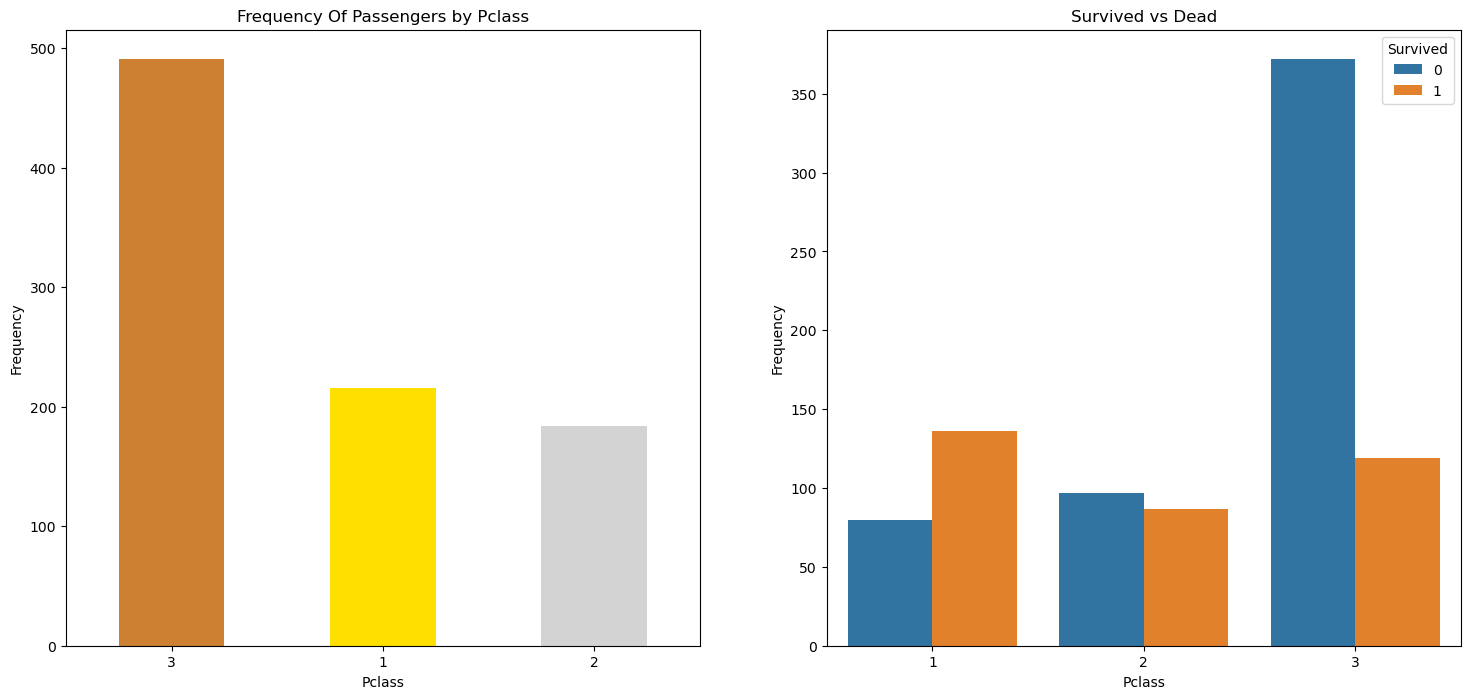

In [39]:
#Indeed, We illustrate the frequency of each class trough a bar chart -Left Chart-. 
#Also, we iluustrate the previous information trough a bar chat -Right Chart_ 
#............... We still believe that pie chart is better to show the pursopse of our analysis ;-)

f,ax=plt.subplots(1,2,figsize=(18,8))
df['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Frequency Of Passengers by Pclass')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Pclass')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation=0)

pclass_sur = sns.countplot('Pclass',hue='Survived',data=df,ax=ax[1])
pclass_sur.set(ylabel='Frequency', xlabel='Pclass')
ax[1].set_title('Survived vs Dead')
plt.show()

In [40]:
# We considered Pclass as an independent feature

# Name Analysis

In [41]:
#The name feature is unique, so we cannot use it as an effective independent feature.
#In data undrestanding step, we split the name feature to extract other feature which contains title.
#The concepts mentioned in our studies informed us some titles should be combined together as another title. 
#For example, titles include 'Jonkheer', 'Don', 'Sir', 'Dr', 'Rev', 'Countess' and 'Lady' are in 'Royalty' group.

TitleDict = {"Capt": "Officer","Col": "Officer","Major": "Officer","Jonkheer": "Royalty",
             "Don": "Royalty", "Sir" : "Royalty","Dr": "Royalty","Rev": "Royalty",
             "Countess":"Royalty", "Mme": "Mrs", "Mlle": "Miss", "Ms": "Mrs","Mr" : "Mr",
             "Mrs" : "Mrs","Miss" : "Miss","Master" : "Master","Lady" : "Royalty"}
#We add a new column 'Title' to df and remove column 'Name'.
df['Title'] = df.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip()).map(TitleDict)
df.drop('Name',axis=1,inplace=True)
#To undrestand better, we calculate mean and count for each group of title
df.groupby('Title')['Age'].agg(['mean', 'count'])

,mean,count
Title,,
Master,4.574167,36
Miss,21.804054,148
Mr,32.368090,398
Mrs,35.718182,110
Officer,56.600000,5
Royalty,42.875000,16


In [42]:
#Although Title field is a non-effective to be used in generating a model,
#it is a perfect feature that is useful to fill Age misiing values.
#So, we apply it in Age part, then remove this feature.

# Sex Analysis

In [43]:
pd.DataFrame(df['Sex'].value_counts())

,Sex
male,577
female,314


In [44]:
df_sex_sur = df.groupby(['Sex', 'Survived'])['Survived'].count().unstack()
df_sex_sur = df_sex_sur.sort_index(ascending=False)
df_sex_sur

Survived,0,1
Sex,,
male,468,109
female,81,233


C:\Users\majid\AppData\Local\Temp\ipykernel_9864\468905144.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['Male','Female'], rotation=0)


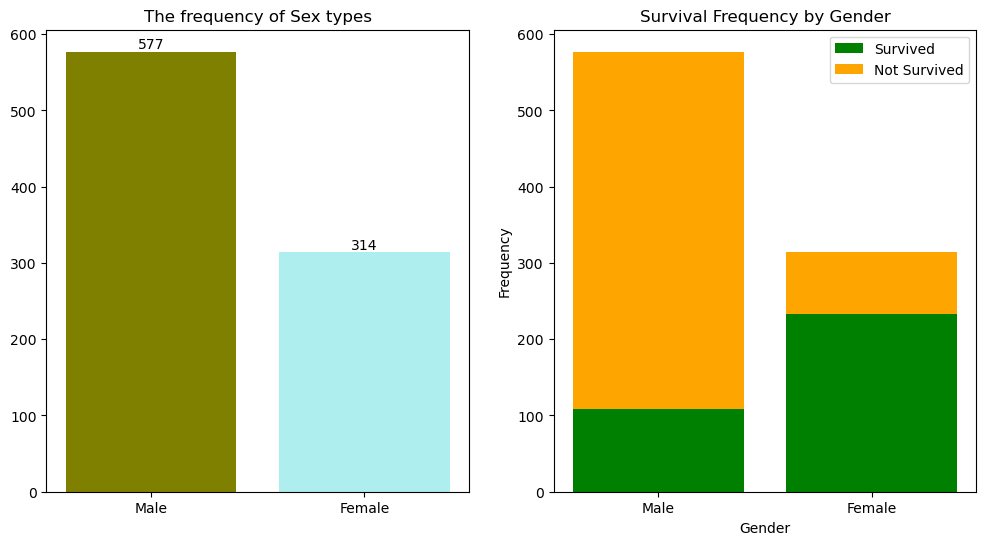

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


#df['Sex'].value_counts().plot(kind='bar', labels=['Male','Female'])
bars=ax1.bar(['Male','Female'],df['Sex'].value_counts(), color = ["olive", "paleturquoise"] )
ax1.set_title("The frequency of Sex types")
# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

# Stacked column chart
bars_ax2 = ax2.bar(df_sex_sur.index, df_sex_sur[1], color='green', label='Survived')
bars_ax2 = ax2.bar(df_sex_sur.index, df_sex_sur[0], color='orange', label='Not Survived', bottom=df_sex_sur[1])

#Clustered column chart
#df_sex_sur.plot(kind='bar', stacked=False, color=['green', 'orange'], ax=ax2)

#ax2.set_xticks(range(len(df_sex_sur.index)))
ax2.set_xticklabels(['Male','Female'], rotation=0)
ax2.set_xlabel('Gender')
ax2.set_ylabel('Frequency')
ax2.set_title('Survival Frequency by Gender')
ax2.legend(loc='upper right')
plt.show()

In [46]:
# As the values of Sex is categorical, we apply dummies technique in order to encode values.

encodd = encode_feature(df, ['Sex'], True, True, 'Survived')
df = encodd.dummy()

In [47]:
# The new feature name is 'Sex_male'
# We considered Sex_male as an independent feature

# Age Analysis

In [48]:
#As we have found float values for Age, we decided to ceil their values (round up) in order to have better undrestanding of the age

df['Age'] = df['Age'].apply(lambda x: np.ceil(x))
#df['Age'] = np.ceil(df['Age'])

C:\Users\majid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


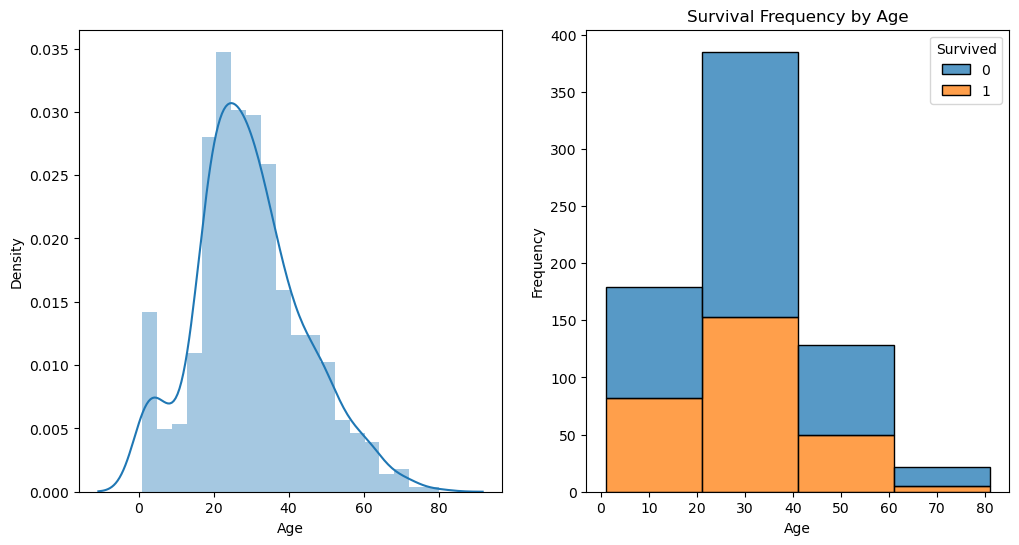

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(df.Age, ax=ax1)
#sns.boxplot(df.Age, ax=ax2)
sns.histplot(data=df.loc [:,['Age','Survived']], binwidth = 20, x= 'Age', hue='Survived' , multiple="stack", ax=ax2)
# sns.histplot(data=df.loc [:,['Age','Survived']], binwidth = 20, x= 'Age', hue='Survived' , color = ['Orange','Yellow'] , 
#               multiple="dodge", shrink=.8, ax=ax2)
# ax2.set_xticklabels(['1','2','3','4'], rotation=0)
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.set_title('Survival Frequency by Age')

#df.Age.plot(kind='hist', title='Titanic')
#df.Age.plot(kind='box', vert=False, title='Titanic')
plt.show()

In [50]:
# plt.figure(figsize=(10, 6))
# sns.histplot(df.Age)

# plt.xlabel('Age')
# plt.ylabel('Distribution')
# plt.title('Distribution of Age')
# plt.show()

### Outlier Data Handling


In [51]:
#As we want to apply average in order to fill misiing values for Age, the result could be affected by outliers.
#So, we decided to manage outliers, firstly.

#To deciding which outlier detection approach is suitable to Age, we calculate normality test via Shapiro test:

_Statistics , _Pvalue = Shapiro(df, 'Age')
print (f'Statistics: {_Statistics}')
print (f'P-value: {_Pvalue}')

The feature Age has at least one missing value which ignored automatically!
Statistics: 0.9811673760414124
P-value: 5.965820548681222e-08


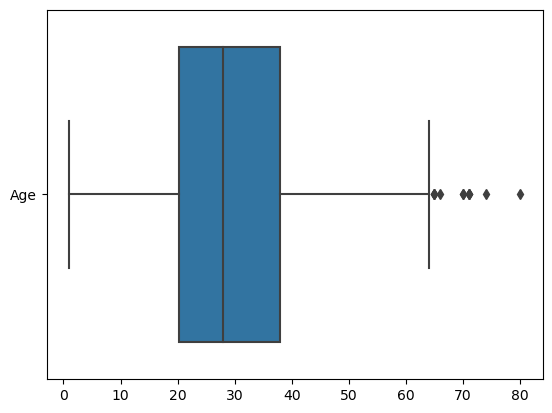

{'Age': [(34, 66.0),
  (55, 65.0),
  (97, 71.0),
  (117, 71.0),
  (281, 65.0),
  (457, 65.0),
  (494, 71.0),
  (631, 80.0),
  (673, 70.0),
  (746, 70.0),
  (852, 74.0)]}

In [52]:
#The result shows that Age has not normal distribution.
#So, we apply IQR approach for detecting outliers.

outliers_detection_IQR(df, cols=['Age'], plot=True)

In [53]:
#To outlier handeling, as the values of outlier are between 65 to 80 and this range is normal for age, 
#we decided to keep these values without change.

### Missing Data Handling

In [54]:
# We consider the median value of each title group to fill the Age misiing value of the same group
df['Age'] = df.apply(lambda row : df.groupby('Title')['Age'].median().loc[row['Title']] if pd.isnull(row['Age']) 
                     else row['Age'] , axis=1)

#df['Age'] = df.apply(lambda row: row['Age'] if not pd.isnull(row['Age']) else df.groupby('Title')['Age'].mean().loc[row['Title']], axis=1)

In [55]:
#Because of that Title feature is not an effective feature in order to apply in the model, 
#we decided to remove it after filling the Age misiing values through it .
df.drop('Title', axis=1, inplace=True)

### Transforming to categorical values:

In [56]:
# Grouped Age: based on the belowmentioned age group ('labels' variable) we create a new column with title Age_range
bins = [0, 4, 12, 18, 30, 50, 70, 120]
labels = ['Baby','Child', 'Teen', 'Young', 'Adult','Middle', 'Elder']
df['Age_range'] = pd.cut(df['Age'], bins, labels = labels,include_lowest = True)
df.head(30)

,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Age_range
PassengerId,,,,,,,,,,,
1,0,3,22.0,1,0,A/5 21171,7.2500,NaN,S,1,Young
2,1,1,38.0,1,0,PC 17599,71.2833,C85,C,0,Adult
3,1,3,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,Young
4,1,1,35.0,1,0,113803,53.1000,C123,S,0,Adult
5,0,3,35.0,0,0,373450,8.0500,NaN,S,1,Adult
6,0,3,30.0,0,0,330877,8.4583,NaN,Q,1,Young
7,0,1,54.0,0,0,17463,51.8625,E46,S,1,Middle
8,0,3,2.0,3,1,349909,21.0750,NaN,S,1,Baby
9,1,3,27.0,0,2,347742,11.1333,NaN,S,0,Young


### Encoding


<AxesSubplot:>

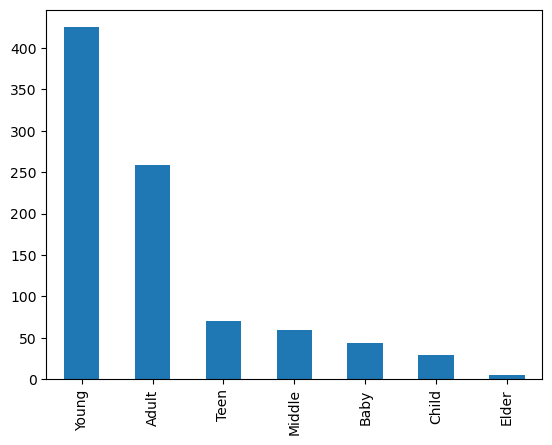

In [57]:
df.Age_range.value_counts().plot(kind='bar')

In [58]:
#Encoding the Age_range

encodd = encode_feature(df, ['Age_range'], True, True, 'Survived')
df = encodd.dummy()

In [59]:
#We remove Age feature and keep Age_range
df.drop('Age',axis=1 , inplace=True)

In [60]:
#We considered the new columns created by encoding Age_range (Age_range_Child, Age_range_Teen, Age_range_Young, 
#Age_range_Adult, Age_range_Middle, Age_range_Elder) feature as independent features 

# SibSp and Parch Analysis

In [61]:
#We apply the both features SipSp (the number of sibilings) abd Parch (the number of parents and children) who are on the board
#to create a new feature named 'Family'. If there are SipSp or Parch for each passenger, we put 1 for family.
#This means that the passenger has family on the board.

df['Family'] = ((df['SibSp'] != 0) | (df['Parch'] != 0)).astype(int)
df.drop(['SibSp','Parch'], axis=1, inplace=True)

In [62]:
pd.DataFrame(df['Family'].value_counts())

,Family
0,537
1,354


In [63]:
df_Fam_sur = df.groupby(['Family', 'Survived'])['Survived'].count().unstack()
#df_Fam_sur = df_Fam_sur.sort_index(ascending=False)
df_Fam_sur

Survived,0,1
Family,,
0,374,163
1,175,179


C:\Users\majid\AppData\Local\Temp\ipykernel_9864\2455026132.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['without family','with family'], rotation=0)


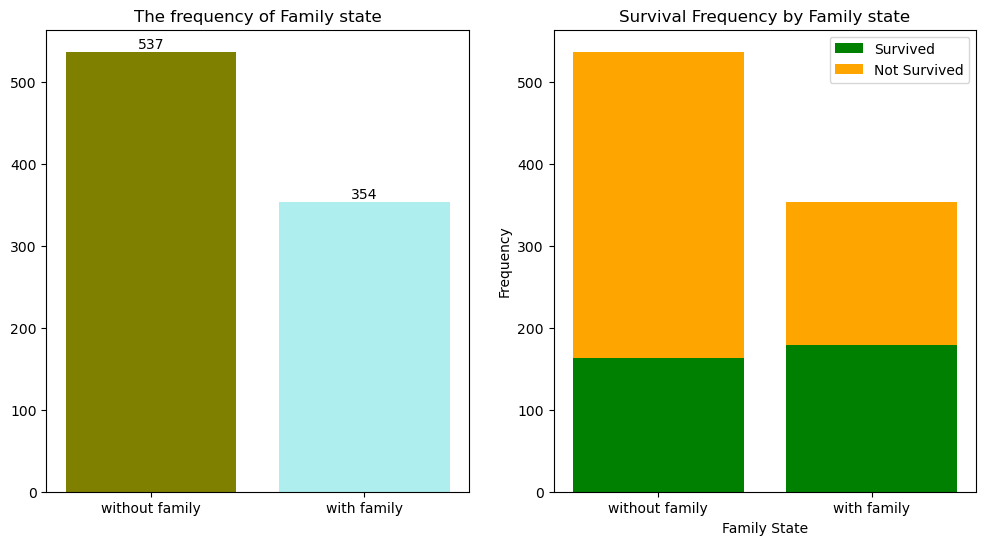

In [64]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


#df['Sex'].value_counts().plot(kind='bar', labels=['Male','Female'])
bars=ax1.bar(['without family','with family'],df['Family'].value_counts(), color = ["olive", "paleturquoise"] )
ax1.set_title("The frequency of Family state")
# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

# Stacked column chart
bars_ax2 = ax2.bar(['0','1'], df_Fam_sur[1], color='green', label='Survived')
bars_ax2 = ax2.bar(['0','1'], df_Fam_sur[0], color='orange', label='Not Survived', bottom=df_Fam_sur[1])

#Clustered column chart
#df_Fam_sur.plot(kind='bar', stacked=False, color=['green', 'orange'], ax=ax2)

#ax2.set_xticks(range(len(df_sex_sur.index)))
ax2.set_xticklabels(['without family','with family'], rotation=0)
ax2.set_xlabel('Family State')
ax2.set_ylabel('Frequency')
ax2.set_title('Survival Frequency by Family state')
ax2.legend(loc='upper right')
plt.show()

In [65]:
#We considered Family as an independent feature

# Ticket Analysis

In [66]:
#df['prefix_ticket'] = df.Ticket.apply(lambda x: str(x.split(' ')[:-1]).replace(".",""))
#df['ticket_No'] = df.Ticket.apply(lambda x: float(x.split(' ')[-1]))
#df.drop('Ticket', axis=1, inplace=True)

In [67]:
#At first, we splited Ticket into 2 parts, ticket number and ticket prefix.
#We found that ticket number is an unique number, so we ignore this part.
#In the second part (ticket prefix), we found that there are huge number of missing values (about 75 percent). 
#Indeed, our study shows that there is no relationship between this field and other features, especially the closet feature, Embarked.
#So, we assessted Ticket as a non-effective feature in the model and we removed the field completely.
# .......... I am sorry to say that about ticket feature. RIP :-(

#df['ticket_No'] = df['Ticket'].apply(lambda x: float(x.split()[-1]) if x.split()[-1].isdigit() else None)
df['ticket_pref'] = df.Ticket.apply(lambda x: str(x.split(' ')[:-1]).replace(".","").strip("[]''"))
 
#df[df['ticket_pref'].apply(len) > 0]

pd.crosstab(df.Embarked,df.ticket_pref,margins=True).style.background_gradient(cmap='summer_r')

ticket_pref,,A/4,A/5,A/S,A4,A5,C,CA,CA/SOTON,FC,FCC,Fa,P/PP,PC,PP,SC,SC/A4,SC/AH,"SC/AH', 'Basle",SC/PARIS,SC/Paris,SCO/W,SO/C,SO/PP,SOC,SOP,SOTON/O2,SOTON/OQ,SP,"STON/O', '2",STON/O2,SW/PP,W/C,WE/P,WEP,All
Embarked,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
C,107,0,0,0,0,0,0,0,0,0,0,0,2,46,0,1,0,0,1,7,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168
Q,76,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,77
S,480,6,18,1,1,2,5,41,1,1,5,1,0,14,3,0,1,2,0,0,0,1,1,3,5,1,2,15,1,12,6,2,10,2,1,644
All,663,6,19,1,1,2,5,41,1,1,5,1,2,60,3,1,1,2,1,7,4,1,1,3,5,1,2,15,1,12,6,2,10,2,1,889


In [68]:
df.drop(['Ticket','ticket_pref'], axis=1, inplace=True)

# Fair Analysis

In [69]:
#As this field do not have an appropriate distribution, we decided to apply a log function to descrease the range of numbers
#In the result, as shown in below chart, the field would be transformed to a normal distribution.
#This transform enable us to analyse the outliers and other analysis in a better way.
#Only remainded problem is (-inf) which appears after applying log function. 
#we decided to solve the problem by adding 1 to all values. 
# ............. I hope you would be happy with our innovative soloution :-P

df['Fare'] = np.log(df['Fare']+1)

C:\Users\majid\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\majid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


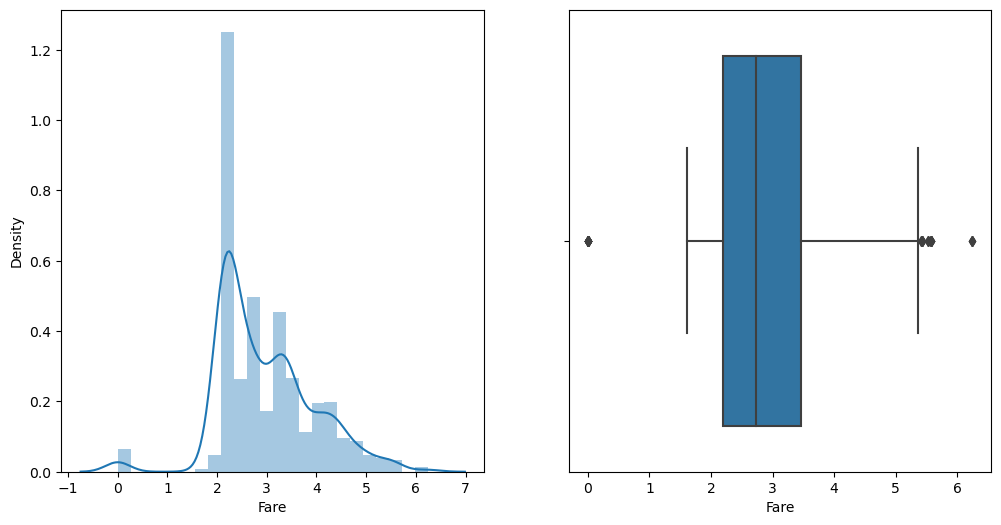

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
sns.distplot(df.Fare, ax=ax1)
sns.boxplot(df.Fare, ax=ax2)
#plt.hist(np.array(df.Fare_1).astype('float'))

#df.Fare_1.plot(kind='hist')
#distplot(df.Fare_1, ax=ax1)
plt.show()

### Outlier Data Handling


In [71]:
#To deciding which outlier detection approach is suitable to Fare, we calculate normality test via Shapiro test:

_Statistics , _Pvalue = Shapiro(df, 'Fare')
print (f'Statistics: {_Statistics}')
print (f'P-value: {_Pvalue}')

Statistics: 0.9152466058731079
P-value: 6.641617113173131e-22


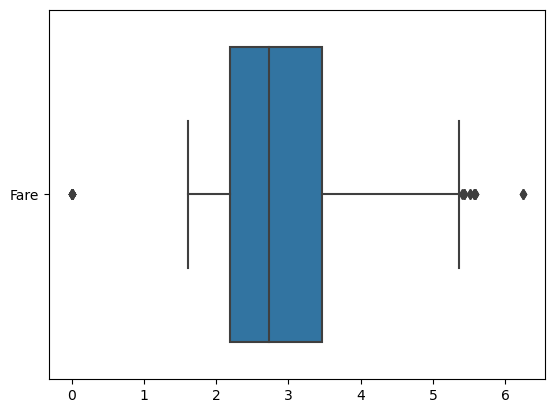

In [72]:
#The result shows that Fare has not normal distribution.
#So, we apply IQR approach for detecting outliers.

_outlier = outliers_detection_IQR(df, cols=['Fare'], plot=True)

In [73]:
#Outlier management
outlier_mng (df, col='Fare', outlier=_outlier, replace='Trim')

C:\Users\majid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

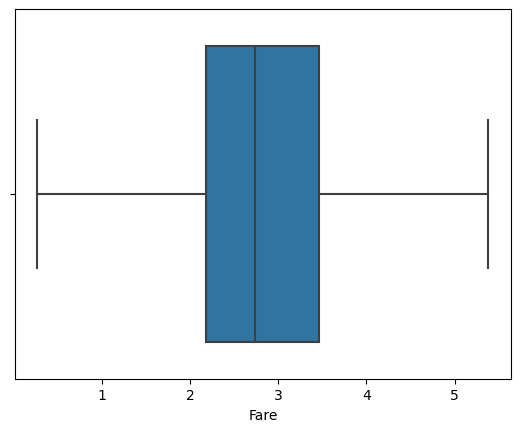

In [74]:
sns.boxplot(df.Fare)

In [75]:
#We considered Fare as an independent feature

# Cabin Analysis

In [76]:
#Cabin Misiing Data Handeling
df['Cabin'].fillna(np.nan, inplace=True)
df['Cabin_Count'] = df.Cabin.apply(lambda x: 1 if pd.isna(x) else len(x.split(' ')))
df['Deck'] = df.Cabin.apply(lambda x: np.nan if pd.isna(x) else str(set([c[0] for c in x.split(' ')])) )

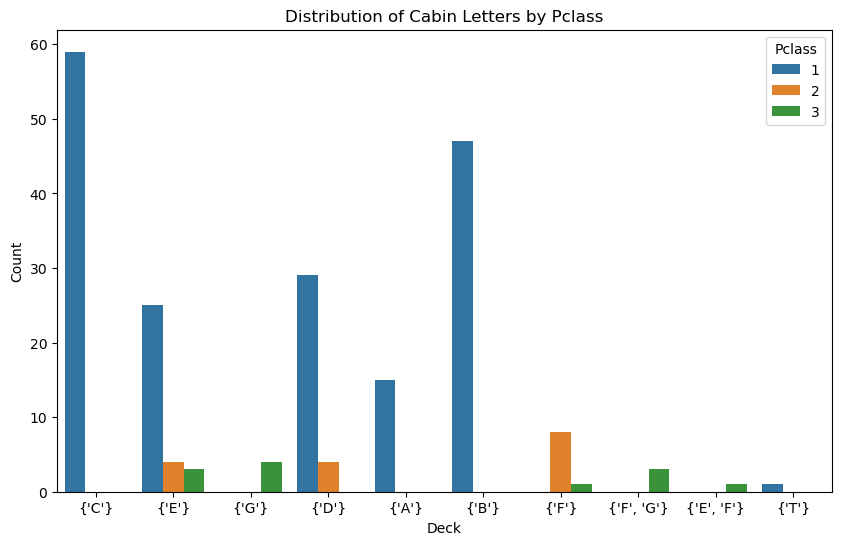

In [77]:
# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.countplot(x='Deck', hue='Pclass', data=df)

# Adding labels and title
plt.xlabel('Deck')
plt.ylabel('Count')
plt.title('Distribution of Cabin Letters by Pclass')

# Display the legend
plt.legend(title='Pclass')

# Show the plot
plt.show()

In [78]:
#We could not find any appropriate way to fill missing values, so we decided to remove Cabin and Deck features
df.drop(['Cabin','Deck'], axis=1, inplace=True)

In [79]:
df_Cabin_sur = df.groupby(['Cabin_Count', 'Survived'])['Survived'].count().unstack()
df_Cabin_sur = df_Cabin_sur.sort_index()
df_Cabin_sur

Survived,0,1
Cabin_Count,,
1,539.0,328.0
2,7.0,9.0
3,3.0,3.0
4,NaN,2.0


C:\Users\majid\AppData\Local\Temp\ipykernel_9864\2265232854.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['1 Cabin','2 Cabins', '3 Cabins', '4 Cabins'], rotation=0)


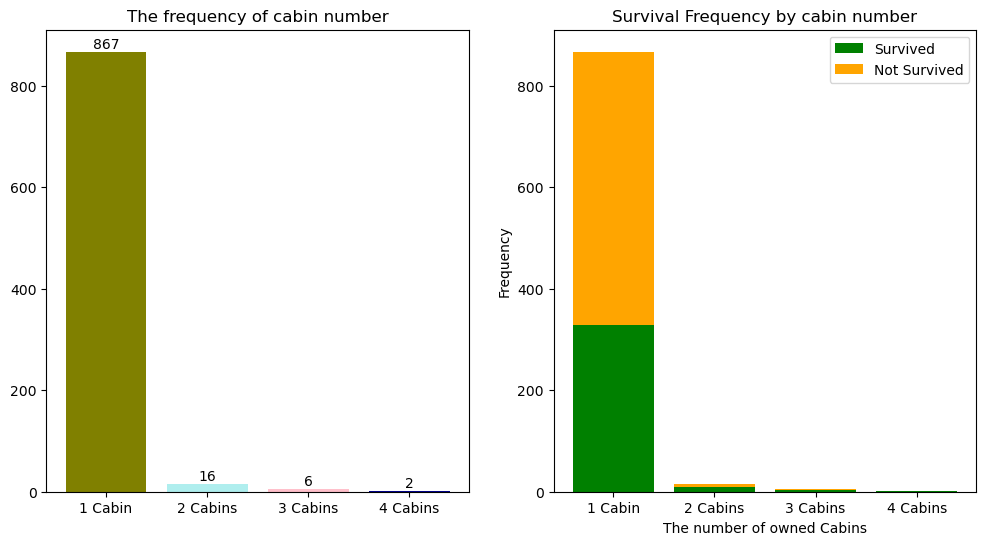

In [80]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


#df['Cabin_Count'].value_counts().plot(kind='bar', labels=['Male','Female'])
bars=ax1.bar(['1 Cabin','2 Cabins', '3 Cabins', '4 Cabins'],df['Cabin_Count'].value_counts(), 
             color = ["olive", "paleturquoise", "pink", "darkblue"] )
ax1.set_title("The frequency of cabin number")
# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

# Stacked column chart
bars_ax2 = ax2.bar(['1 Cabin','2 Cabins', '3 Cabins', '4 Cabins'], df_Cabin_sur[1], color='green', label='Survived')
bars_ax2 = ax2.bar(['1 Cabin','2 Cabins', '3 Cabins', '4 Cabins'], df_Cabin_sur[0], color='orange', label='Not Survived', bottom=df_Cabin_sur[1])

#Clustered column chart
#df_Cabin_sur.plot(kind='bar', stacked=False, color=['green', 'orange'], ax=ax2)

#ax2.set_xticks(range(len(df_Cabin_sur.index)))
ax2.set_xticklabels(['1 Cabin','2 Cabins', '3 Cabins', '4 Cabins'], rotation=0)
ax2.set_xlabel('The number of owned Cabins')
ax2.set_ylabel('Frequency')
ax2.set_title('Survival Frequency by cabin number')
ax2.legend(loc='upper right')
plt.show()

### Missing Data Handling


In [81]:
#In the missing analysis part, we observed missing values in Cabin feature. 
#When we changed the feature into Cabin_count feature (so the Cabin would be removed), 
#we supposed there is atleast one cabin for every passenger.
#So, the misiing values were filled by 1.
# ................ There is no more misiing values, doode! :-)

In [82]:
#We considered Cabin_count as an independent feature

# Embarked Analysis

In [83]:
df_sex_sur = df.groupby(['Embarked', 'Survived'])['Survived'].count().unstack()
df_sex_sur = df_sex_sur.sort_values(by = 0, ascending = False)
df_sex_sur

Survived,0,1
Embarked,,
S,427,217
C,75,93
Q,47,30


C:\Users\majid\AppData\Local\Temp\ipykernel_9864\3763419396.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(['S','C','Q'], rotation=0)


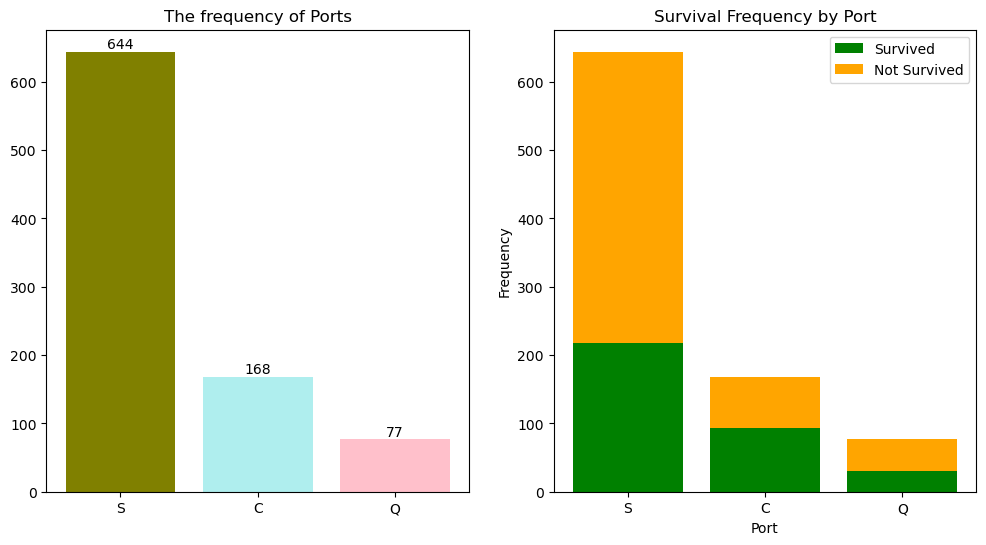

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


#df['Sex'].value_counts().plot(kind='bar', labels=['Male','Female'])
bars=ax1.bar(['S','C','Q'],df['Embarked'].value_counts(), color = ["olive", "paleturquoise", "pink"] )
ax1.set_title("The frequency of Ports")
# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(yval, 1), ha='center', va='bottom')

# Stacked column chart
bars_ax2 = ax2.bar(['S','C','Q'], df_sex_sur[1], color='green', label='Survived')
bars_ax2 = ax2.bar(['S','C','Q'], df_sex_sur[0], color='orange', label='Not Survived', bottom=df_sex_sur[1])

#Clustered column chart
#df_sex_sur.plot(kind='bar', stacked=False, color=['green', 'orange'], ax=ax2)

#ax2.set_xticks(range(len(df_sex_sur.index)))
ax2.set_xticklabels(['S','C','Q'], rotation=0)
ax2.set_xlabel('Port')
ax2.set_ylabel('Frequency')
ax2.set_title('Survival Frequency by Port')
ax2.legend(loc='upper right')
plt.show()

### Missing Data Handling


In [85]:
df[df['Embarked'].isna()]
#As there are 2 rows with NaN value for Embarked, the rows would be removed 
df.dropna(subset='Embarked', inplace=True)

### Encoding


In [86]:
encodd = encode_feature(df, ['Embarked'], True, True, 'Survived')
df = encodd.dummy()

In [87]:
#We considered the new columns created by encoding Embarked feature (Embarked_Q, Embarked_S) as independent features 

# Scaling

In [88]:
#There are two features (Pclass, Fare) which is not scaled.
#As other features have 2 values 0 and 1, so, we applied MinMax method for scaling.

df = minmax_scaler (df)

# Feature Selection

<AxesSubplot:>

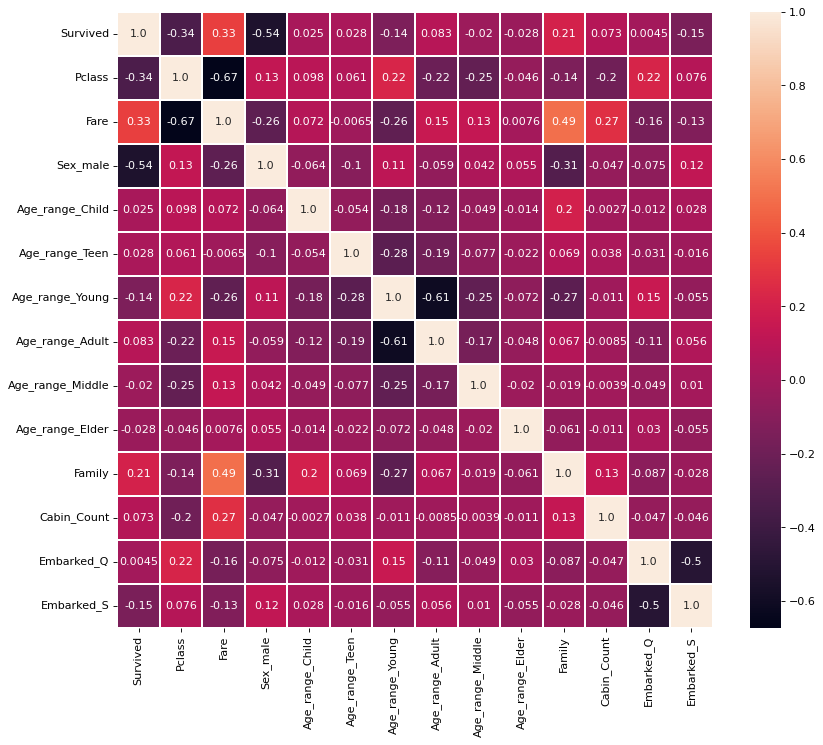

In [89]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), annot=True , fmt=".2" ,linewidths=.1)

# Modeling

In [90]:
# We skip Balancing level due to saving the time
# If we will not achive a good result, we will come back and test tow methods over fiiting and under fitting

In [91]:
# As the number of input data is limited, it is better to apply cross validation approache,
# But, to save the time, we decided to apply train test method here, 
# Maybe after getting good result in a specific model, we experiment it with cross validation method

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
#Total X (independed features)
X = df.drop('Survived', axis=1)
#Total Y (Target feature)
Y = df[['Survived']]
#generating Xtrain, Xtest (independed features for train set and test set) 
#and Ytrain, Ytest (Targer feature for train set and test set)
Xtrain, Xtest, Ytrain, Ytest = train_test_split (X, Y, test_size=0.2, random_state=2020)

In [94]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
#Creting instance
DTP = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth=4,
    min_samples_split=4,
    min_samples_leaf=5,
    random_state=42)
#Learning from train set
DTP.fit(Xtrain, Ytrain)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=5, min_samples_split=4,
                       random_state=42)

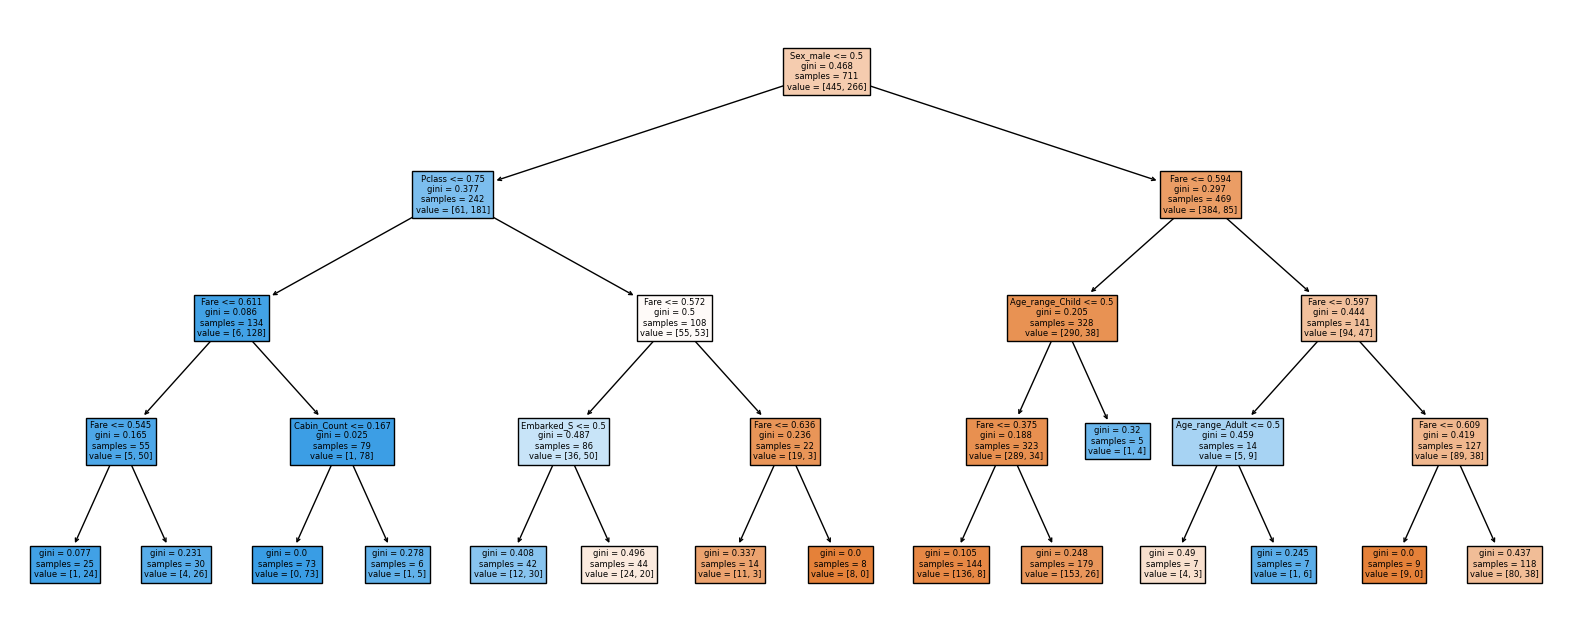

In [95]:
from sklearn.tree import plot_tree
plt.figure(figsize = (20,8))
plot_tree(DTP,feature_names=X.columns, filled = True);

In [96]:
#Predict the goal for test set and calculate accuracy

from sklearn.metrics import accuracy_score
accuracy_score(Ytest,DTP.predict(Xtest))

0.7752808988764045

In [97]:
#import two levels of cross_val_predict and cross_val_score
from sklearn.model_selection import cross_val_predict, cross_val_score

In [98]:
#Calculating accuracy in cross_val_score level
score_1 = cross_val_score(DTP, X, Y, cv=10, scoring='accuracy')
score_1.mean()

0.788508682328907

In [99]:
#Shuffling the data and calculating accuracy in cross_val_score level
from sklearn.model_selection import KFold

kf = KFold(10, shuffle = True, random_state = 42)
score_2 = cross_val_score(DTP, X , Y , cv = kf, scoring = 'accuracy' )
score_2.mean()

0.7986593462717059

In [100]:
#Calculating accuracy in cross_val_predict level
score_3 = accuracy_score(Y,cross_val_predict (DTP, X, Y, cv = 10))
score_3

0.7885264341957255

In [101]:
#Calculating Confusion Matrix in cross_val_predict level
from sklearn.metrics import confusion_matrix
confusion_matrix(Y,cross_val_predict (DTP, X, Y, cv = 10))

array([[504,  45],
       [143, 197]], dtype=int64)

In [102]:

from sklearn.metrics import classification_report
target_names = ['Dead', 'Survived']
Y_pred = cross_val_predict (DTP, X, Y, cv = 10)
print(classification_report(Y, Y_pred, target_names=target_names))

              precision    recall  f1-score   support

        Dead       0.78      0.92      0.84       549
    Survived       0.81      0.58      0.68       340

    accuracy                           0.79       889
   macro avg       0.80      0.75      0.76       889
weighted avg       0.79      0.79      0.78       889



In [103]:
#Calculating accuracy manually 
#acc = (TP+TN)/(TP+TN+FP+FN)

In [104]:
#Here, we decided to seperate train set and test set, then apply cross-validation method on train set
Xtrain, Xtest, Ytrain, Ytest = train_test_split (X, Y, test_size=0.2, random_state=42)
kf = KFold(10, shuffle = True, random_state = 42)
score_train = cross_val_score(DTP, Xtrain , Ytrain , cv = kf, scoring = 'accuracy' )
score_train.mean()

0.8058294209702661

In [105]:
#Then calculate accuracy based on prediction on test set
score_4 = accuracy_score(Ytest,DTP.predict(Xtest))
score_4
#The result shows, when test set is not included in training level, the accuracy score would be low

0.8146067415730337

In [106]:
#Random Forest 
from sklearn.ensemble import RandomForestClassifier

DTP = RandomForestClassifier(max_depth=4, random_state=42)
DTP.fit(Xtrain, Ytrain)
score_5 = accuracy_score(Ytest,DTP.predict(Xtest))
score_5

C:\Users\majid\AppData\Local\Temp\ipykernel_9864\810443717.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  DTP.fit(Xtrain, Ytrain)


0.8089887640449438